<a href="https://colab.research.google.com/github/Courage-7/Hamoye-Internship-Data-Science/blob/main/stage_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Practical Time Series Analysis & Forcast - Stage E.                   
### By Courage Siameh | ID: 186c55fbefc1f000



### Loading & Exploring our Time Series Dataset.
### Dataset Link: https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption

In [1]:
# Download the dataset from the dataset link URL provided.
!wget https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip


--2024-06-19 07:35:58--  https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘individual+household+electric+power+consumption.zip’

individual+househol     [     <=>            ]  19.68M  20.5MB/s    in 1.0s    

2024-06-19 07:36:00 (20.5 MB/s) - ‘individual+household+electric+power+consumption.zip’ saved [20640916]



In [2]:
# unzipping our downloaded dataset
!wget "https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip" -O dataset.zip && unzip dataset.zip


--2024-06-19 07:36:00--  https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘dataset.zip’

dataset.zip             [     <=>            ]  19.68M  22.9MB/s    in 0.9s    

2024-06-19 07:36:01 (22.9 MB/s) - ‘dataset.zip’ saved [20640916]

Archive:  dataset.zip
  inflating: household_power_consumption.txt  


### Read and load dataset

In [3]:
# Load dataset and read dataset
import pandas as pd

data =pd.read_csv('household_power_consumption.txt', sep = ';')

# Display the first few rows of the dataset
print(data.head())


         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


<ipython-input-3-f1e2d760c38b>:4: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data =pd.read_csv('household_power_consumption.txt', sep = ';')


### Combining Date and Time into a Single Datetime Column

In [4]:
# Combine Date and Time into a single datetime column
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')

# Drop the original Date and Time columns
data.drop(['Date', 'Time'], axis=1, inplace=True)

# Set the Datetime column as the index
data.set_index('Datetime', inplace=True)

# Display the first few rows of the dataset
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


### Handling Missing Values

In [5]:
# Convert numeric columns to appropriate data types
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check for missing values
missing_values = data.isnull().sum()

# Display missing values
missing_values


Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

### Resampling the Data to a Daily Frequency

In [6]:
# Resample the data to a daily frequency, summing the values
daily_data = data.resample('D').sum()

# Display the first few rows of the daily data
daily_data.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


### Splitting the Data into Training and Test Sets

In [7]:
# Define the number of days for the test set
test_days = 300

# Split the data into training and test sets
train_data = daily_data.iloc[:-test_days]
test_data = daily_data.iloc[-test_days:]

# Display the shapes of the training and test sets
train_data.shape, test_data.shape


((1142, 7), (300, 7))

###Combining Date and Time into a Single Datetime Column

In [8]:


# Convert numeric columns to appropriate data types
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check for missing values
missing_values = data.isnull().sum()

# Resample the data to a daily frequency, summing the values
daily_data = data.resample('D').sum()

# Define the number of days for the test set
test_days = 300

# Split the data into training and test sets
train_data = daily_data.iloc[:-test_days]
test_data = daily_data.iloc[-test_days:]

train_data.shape, test_data.shape, daily_data.head(), missing_values


((1142, 7),
 (300, 7),
             Global_active_power  Global_reactive_power    Voltage  \
 Datetime                                                            
 2006-12-16             1209.176                 34.922   93552.53   
 2006-12-17             3390.460                226.006  345725.32   
 2006-12-18             2203.826                161.792  347373.64   
 2006-12-19             1666.194                150.942  348479.01   
 2006-12-20             2225.748                160.998  348923.61   
 
             Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
 Datetime                                                                      
 2006-12-16            5180.8             0.0           546.0          4926.0  
 2006-12-17           14398.6          2033.0          4187.0         13341.0  
 2006-12-18            9247.2          1063.0          2621.0         14018.0  
 2006-12-19            7094.0           839.0          7602.0          6197.0  
 2006

### Preparing the Data for Facebook Prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 48.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 6.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet


In [13]:
from prophet import Prophet

# Prepare the data for Prophet
train_data_prophet = train_data.reset_index()[['Datetime', 'Global_active_power']].rename(columns={'Datetime': 'ds', 'Global_active_power': 'y'})

# Initialize the Prophet model
model = Prophet()

# Fit the model to the training data
model.fit(train_data_prophet)

# Create a dataframe for future predictions
future = model.make_future_dataframe(periods=test_days)

# Make predictions
forecast = model.predict(future)

# Display the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgb35y27j/zrx_55cq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgb35y27j/hw8saqjl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8919', 'data', 'file=/tmp/tmpgb35y27j/zrx_55cq.json', 'init=/tmp/tmpgb35y27j/hw8saqjl.json', 'output', 'file=/tmp/tmpgb35y27j/prophet_modelzdx5qpaf/prophet_model-20240619074125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1437,2010-11-22,1858.388856,1241.601864,2498.493481
1438,2010-11-23,2003.674706,1427.474129,2593.311090
1439,2010-11-24,1999.700530,1447.342124,2562.583717
1440,2010-11-25,1834.268080,1250.329593,2387.511262
1441,2010-11-26,1949.496188,1359.123604,2550.418462


### Evaluate the Model

In [12]:
# Merge the forecast with the test data
forecast_test = forecast.set_index('ds').join(test_data[['Global_active_power']])
forecast_test = forecast_test[['Global_active_power', 'yhat']]

# Calculate the mean absolute error
mae = (forecast_test['Global_active_power'] - forecast_test['yhat']).abs().mean()

mae


313.65633865029747

Firstly, forward-fill all the missing values.Resample the data from a minute sampling rate to an hourly sampling rate (i.e sum over the minutes for each hour). Which of the following is a plot of the hourly global_active_power over time?

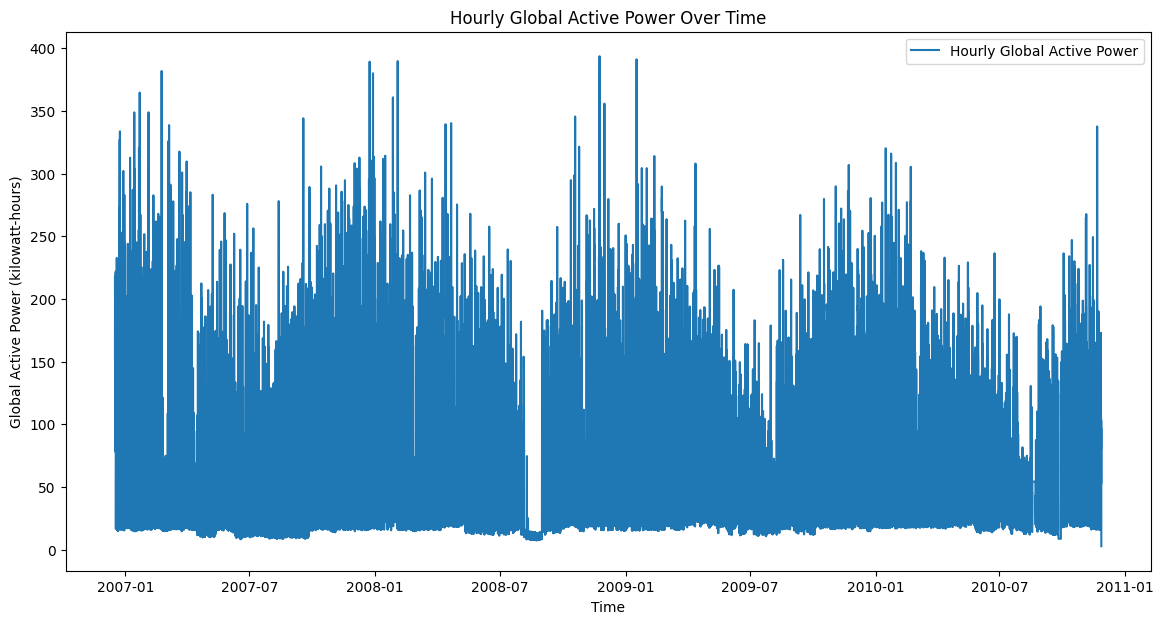

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert numeric columns to appropriate data types
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Forward-fill missing values
data = data.ffill()

# Resample the data to an hourly frequency, summing the values
hourly_data = data.resample('H').sum()

# Plot the hourly global_active_power over time
plt.figure(figsize=(14, 7))
plt.plot(hourly_data.index, hourly_data['Global_active_power'], label='Hourly Global Active Power')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatt-hours)')
plt.title('Hourly Global Active Power Over Time')
plt.legend()
plt.show()

In [16]:
# Calculate the Pearson correlation coefficient
correlation = data['Global_active_power'].corr(data['Voltage'])

# Print the Pearson correlation coefficient to 3 decimal places
print(f"Pearson correlation coefficient between global_active_power and voltage: {correlation:.3f}")

Pearson correlation coefficient between global_active_power and voltage: -0.396


In [17]:
# Calculate the Pearson correlation coefficient
correlation = data['Voltage'].corr(data['Global_intensity'])

# Print the Pearson correlation coefficient to 2 decimal places
print(f"Pearson correlation coefficient between Voltage and Global_intensity: {correlation:.2f}")

Pearson correlation coefficient between Voltage and Global_intensity: -0.41


### train a Univariate time series modeling using this time column (‘dt’ or ‘ds’) and the global_active_power (or ‘y’).

In [22]:
# Resample the data to a daily frequency, summing the values
daily_data = data.resample('D').sum()

# Define the number of days for the test set
test_days = 300

# Split the data into training and test sets
train_data = daily_data.iloc[:-test_days]
test_data = daily_data.iloc[-test_days:]

### Train the prophet model

In [23]:
# Prepare the data for Prophet
train_data_prophet = train_data.reset_index()[['Datetime', 'Global_active_power']].rename(columns={'Datetime': 'ds', 'Global_active_power': 'y'})

# Initialize the Prophet model
model = Prophet()

# Fit the model to the training data
model.fit(train_data_prophet)

# Create a dataframe for future predictions
future = model.make_future_dataframe(periods=test_days)

# Make predictions
forecast = model.predict(future)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgb35y27j/rsaakgdl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgb35y27j/nwgkyicr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64172', 'data', 'file=/tmp/tmpgb35y27j/rsaakgdl.json', 'init=/tmp/tmpgb35y27j/nwgkyicr.json', 'output', 'file=/tmp/tmpgb35y27j/prophet_modelhm18q3j0/prophet_model-20240619075742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### Evaluate the data

In [24]:
import numpy as np
# Merge the forecast with the test data
forecast_test = forecast.set_index('ds').join(test_data[['Global_active_power']])
forecast_test = forecast_test[['Global_active_power', 'yhat']]

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((forecast_test['Global_active_power'] - forecast_test['yhat']) / forecast_test['Global_active_power'])) * 100

# Print the MAPE
print(f"MAPE: {mape:.2f}%")


MAPE: 27.20%


In [27]:
from sklearn.metrics import mean_squared_error

# Handle NaN values before calculating RMSE
forecast_test_clean = forecast_test.dropna(subset=['Global_active_power', 'yhat'])  # Drop rows with NaN in either column

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(forecast_test_clean['Global_active_power'], forecast_test_clean['yhat']))

# Print the RMSE
print(f"RMSE: {rmse:.2f}")


RMSE: 401.61


In [28]:
# Prepare the data for Prophet
train_data_prophet = train_data.reset_index()[['Datetime', 'Global_active_power']].rename(columns={'Datetime': 'ds', 'Global_active_power': 'y'})

# Initialize the Prophet model
model = Prophet(weekly_seasonality=True)

# Fit the model to the training data
model.fit(train_data_prophet)

# Create a dataframe for future predictions
future = model.make_future_dataframe(periods=test_days)

# Make predictions
forecast = model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgb35y27j/5e21sctn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgb35y27j/j5atl5am.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91741', 'data', 'file=/tmp/tmpgb35y27j/5e21sctn.json', 'init=/tmp/tmpgb35y27j/j5atl5am.json', 'output', 'file=/tmp/tmpgb35y27j/prophet_modelns771wn1/prophet_model-20240619080451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:04:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:04:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


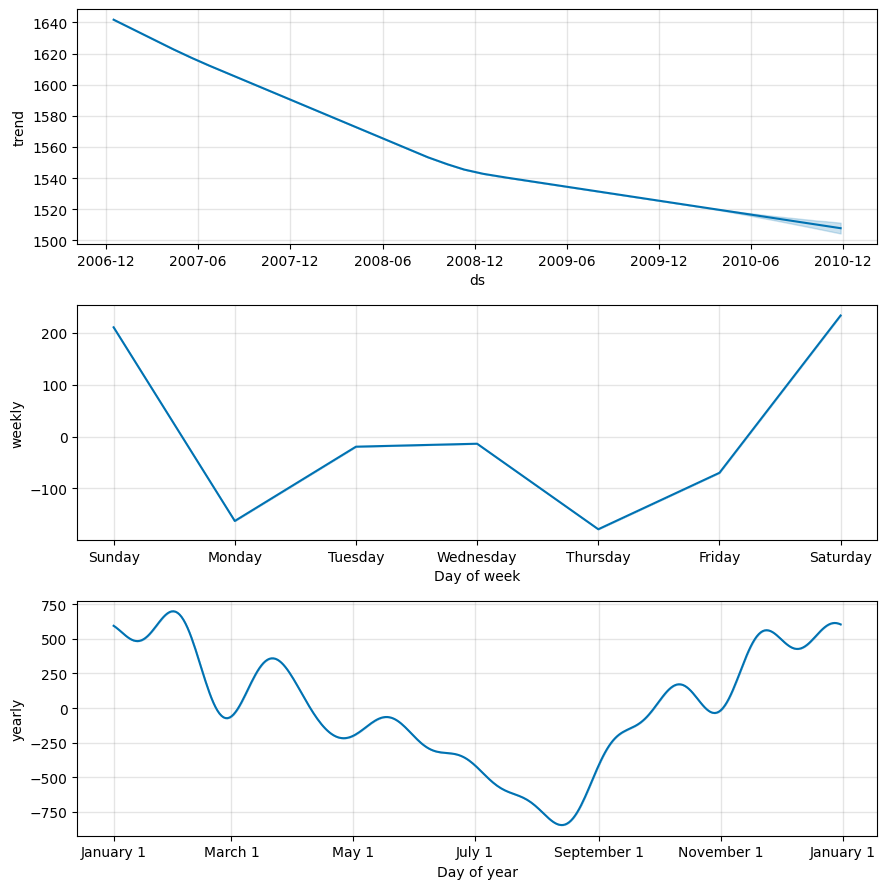

In [29]:
# Plot the forecast components
fig = model.plot_components(forecast)


In [30]:
# Add the additional regressors to the training data
regressors = ['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for regressor in regressors:
    train_data_prophet[regressor] = train_data[regressor].values

In [31]:
# Initialize the Prophet model
model = Prophet()

# Add the additional regressors to the model
for regressor in regressors:
    model.add_regressor(regressor)

# Fit the model to the training data
model.fit(train_data_prophet)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgb35y27j/07l7ami8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgb35y27j/6iixqfgf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15228', 'data', 'file=/tmp/tmpgb35y27j/07l7ami8.json', 'init=/tmp/tmpgb35y27j/6iixqfgf.json', 'output', 'file=/tmp/tmpgb35y27j/prophet_modelbyta7q2c/prophet_model-20240619080851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:08:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:08:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [32]:
# Create a dataframe for future predictions
future = model.make_future_dataframe(periods=test_days)

# Add the additional regressors to the future dataframe
for regressor in regressors:
    future[regressor] = daily_data[regressor].values[-(len(future)):]

# Make predictions
forecast = model.predict(future)


In [35]:
# Handle NaN values before calculating MAPE
forecast_test.dropna(subset=['Global_active_power', 'yhat'], inplace=True)

from sklearn.metrics import mean_absolute_percentage_error

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(forecast_test['Global_active_power'], forecast_test['yhat']) * 100

# Print the MAPE
print(f"MAPE: {mape:.2f}%")

MAPE: 2.49%


In [36]:
# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(forecast_test['Global_active_power'], forecast_test['yhat']))

# Print the RMSE
print(f"RMSE: {rmse:.2f}")

RMSE: 33.83


In [37]:
# Create a dataframe for future predictions
future = model.make_future_dataframe(periods=test_days)

# Add the additional regressors to the future dataframe
for regressor in regressors:
    future[regressor] = daily_data[regressor].values[-(len(future)):]

# Make predictions
forecast = model.predict(future)


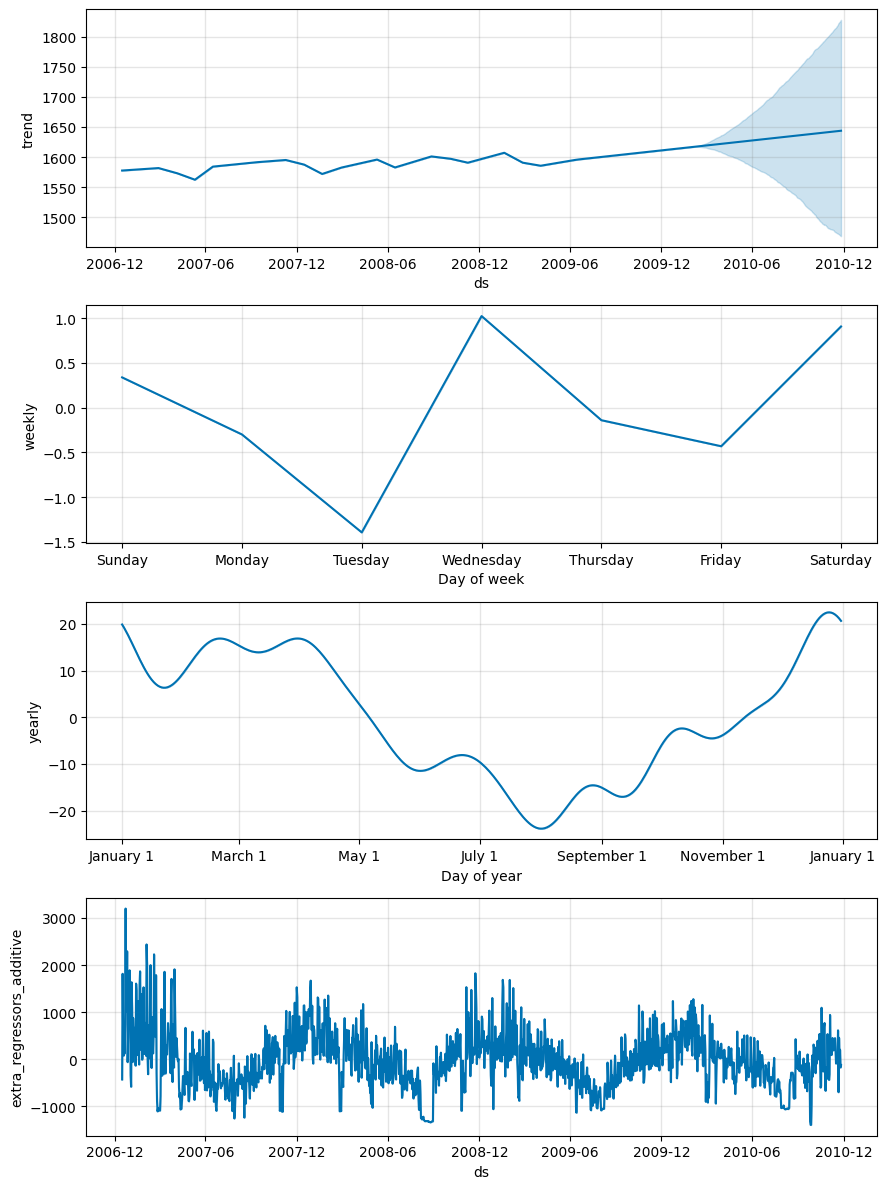

In [38]:
# Plot the forecast components
fig = model.plot_components(forecast)
plt.show()
